### Principal Component Analysis (PCA)

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
mnist = datasets.fetch_openml('mnist_784', version=1)

In [3]:
# train test split
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# standardise
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

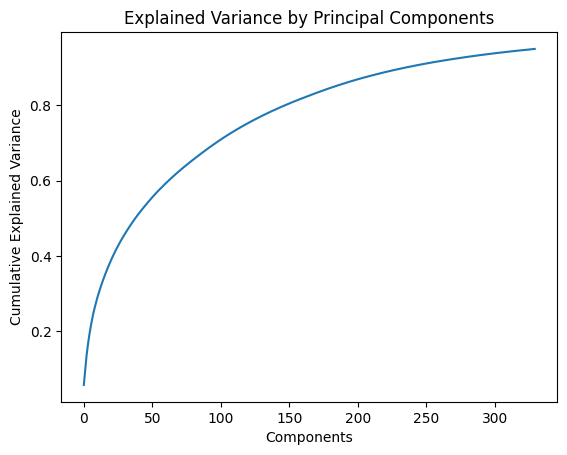

In [6]:
explained_variance = pca.explained_variance_ratio_
cumul_explained_variance = np.cumsum(explained_variance)
plt.plot(cumul_explained_variance)
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show() 

In [7]:
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

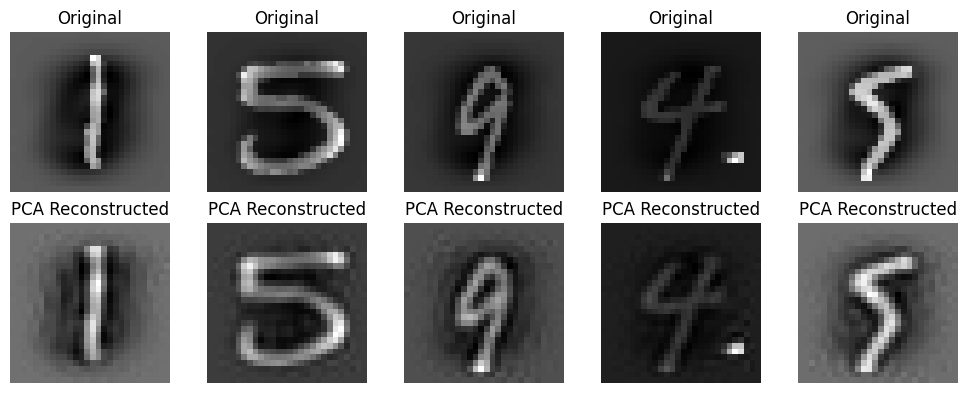

In [ ]:
def plot_digits(original, reconstructed, n=5):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')        
        # Reconstructed
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("PCA Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_digits(X_train_scaled[20:25], X_train_reconstructed[20:25])

In [9]:
# build model 
svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train_pca, y_train)

SVC()

Accuracy: 0.9644285714285714
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.93      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



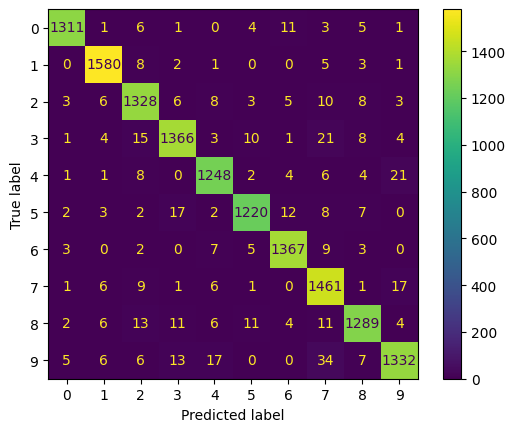

In [ ]:
# evaluate model
y_pred = svm.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot() 
plt.show() 